In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mydefs as md

In [2]:
filename = "data-in/Global_Mobility_Report.csv"
daily_new_path = "dfs/confirmed_ncov_df.csv"
# cases_synced_path = "data-out/synced_ncovid_2019_dataset.csv"
# death_synced_path = "data-out/synced_ncovid_2019_death_dataset.csv"
combined_df_p = r"C:\programming\mobility\dfs\combined_df.csv"

In [87]:
df_country, df_sea = md.get_df(filename)

c:\users\mppc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\mppc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
df = pd.read_csv(combined_df_p)
df.head()

,continent,country,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,outdoor,acc_case,acc_death,new_case,new_death,continent_marker
0,Asia and Oceania,Afghanistan,2020-02-15,-9.0,-10.0,0.0,-2.0,-28.0,5.0,-9.8,0,0,0,0,1.096753
1,Asia and Oceania,Afghanistan,2020-02-16,3.0,11.0,1.0,10.0,4.0,0.0,5.8,0,0,0,0,0.883960
2,Asia and Oceania,Afghanistan,2020-02-17,6.0,11.0,2.0,9.0,5.0,-1.0,6.6,0,0,0,0,1.170683
3,Asia and Oceania,Afghanistan,2020-02-18,3.0,5.0,3.0,9.0,6.0,-1.0,5.2,0,0,0,0,0.893549
4,Asia and Oceania,Afghanistan,2020-02-19,-1.0,3.0,1.0,0.0,5.0,1.0,1.6,0,0,0,0,1.117387


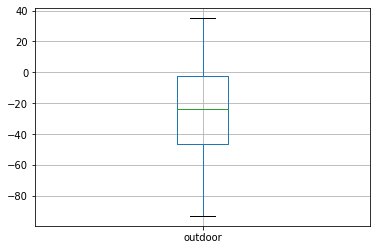

In [93]:
df[["outdoor"]].boxplot()

In [95]:
q3_o = np.percentile(df["outdoor"], 75, interpolation='midpoint')
q3_o

-2.2

In [96]:
q1_o = np.percentile(df["outdoor"], 25, interpolation='midpoint')
q1_o

-46.8

In [97]:
outdoor = df[df["outdoor"]<q1_o]
outdoor_10 = outdoor[["country", "date", "continent"]].groupby(["country", "continent"]).count().sort_values("date", ascending=False)[:10]
outdoor_10.columns = ["no. of dates"]
outdoor_10["%"] = round(outdoor_10["no. of dates"]/105*100, 1)
outdoor_10

,,no. of dates,%
country,continent,,
Honduras,Americas,74,70.5
Ecuador,Americas,74,70.5
Peru,Americas,74,70.5
Philippines,Asia and Oceania,73,69.5
Argentina,Americas,71,67.6
Panama,Americas,70,66.7
Mauritius,Africa,70,66.7
Bolivia,Americas,69,65.7
El Salvador,Americas,69,65.7


In [98]:
outdoor_0 = df[df["outdoor"]>q3_o]
outdoor_0_10 = outdoor_0[["country", "date", "continent"]].groupby(["country", "continent"]).count().sort_values("date", ascending=False)[:10]
outdoor_0_10.columns = ["no. of dates"]
outdoor_0_10["%"] = round(outdoor_0_10["no. of dates"]/105*100, 1)
outdoor_0_10

,,no. of dates,%
country,continent,,
South Korea,Asia and Oceania,62,59.0
Denmark,Europe,56,53.3
Sweden,Europe,53,50.5
Belarus,Europe,51,48.6
Mongolia,Asia and Oceania,47,44.8
Yemen,Asia and Oceania,39,37.1
Benin,Africa,39,37.1
Libya,Africa,38,36.2
Latvia,Europe,37,35.2


In [82]:
outdoor_0 = df[df["workplaces"]>df["workplaces"].median()]
outdoor_0_10 = outdoor_0[["country", "date", "continent"]].groupby(["country", "continent"]).count().sort_values("date", ascending=False)[:10]
outdoor_0_10.columns = ["no. of dates"]
outdoor_0_10["%"] = round(outdoor_0_10["no. of dates"]/105*100, 1)
outdoor_0_10

,,no. of dates,%
country,continent,,
Mozambique,Africa,102,97.1
Benin,Africa,102,97.1
South Korea,Asia and Oceania,101,96.2
Taiwan,Asia and Oceania,101,96.2
Yemen,Asia and Oceania,100,95.2
Cameroon,Africa,100,95.2
Burkina Faso,Africa,100,95.2
Mali,Africa,99,94.3
Zambia,Africa,99,94.3


In [83]:
residential = df[df["residential"]>df["residential"].median()]
residential_10 = residential[["country", "date", "continent"]].groupby(["country", "continent"]).count().sort_values("date", ascending=False)[:10]
residential_10.columns = ["no. of dates"]
residential_10["%"] = round(residential_10["no. of dates"]/105*100, 1)
residential_10

,,no. of dates,%
country,continent,,
Kuwait,Asia and Oceania,77,73.3
Sri Lanka,Asia and Oceania,76,72.4
Panama,Americas,76,72.4
Philippines,Asia and Oceania,75,71.4
Peru,Americas,75,71.4
Spain,Europe,75,71.4
Paraguay,Americas,74,70.5
Honduras,Americas,74,70.5
Portugal,Europe,74,70.5


In [84]:
doc = []
countries = df["country"].unique()
for c in countries:
    df_c = df[df["country"] == c]
    doc.append(np.corrcoef(df_c["new_case"],df_c["outdoor"])[0][1])
df_corr = pd.DataFrame([countries, doc]).T
df_corr.columns = ["country", "outdoor vs new_case corr"]
df_corr.set_index("country", inplace=True)
df_corr.sort_values("outdoor vs new_case corr")[:10]
#act accordingly. decrease outdoor when the no. of new cases rises

,outdoor vs new_case corr
country,
Singapore,-0.8706
United Kingdom,-0.869907
United States,-0.847665
Italy,-0.826143
Croatia,-0.819444
Romania,-0.786876
Belgium,-0.767033
Netherlands,-0.76034
Tajikistan,-0.739813


In [85]:
df_corr.sort_values("outdoor vs new_case corr", ascending=False)[:10]

,outdoor vs new_case corr
country,
Mongolia,0.1825
Sweden,0.145741
Taiwan,0.0846002
Zambia,0.00826658
Zimbabwe,-0.0054982
Namibia,-0.0651602
Benin,-0.0702812
Cambodia,-0.0731409
Trinidad and Tobago,-0.0812176


In [77]:
df_corr_mid = df_corr[df_corr["outdoor vs new_case corr"]<0.1]
df_corr_mid = df_corr_mid[df_corr_mid["outdoor vs new_case corr"]>-0.1]
df_corr_mid
#no act, not related 

,outdoor vs new_case corr
country,
Benin,-0.0702812
Cambodia,-0.0731409
Ghana,-0.0813388
Namibia,-0.0651602
Taiwan,0.0846002
Trinidad and Tobago,-0.0812176
Zambia,0.00826658
Zimbabwe,-0.0054982


In [12]:
df["date"] = pd.to_datetime(df["date"])

In [54]:
date = df["date"].unique()
date_1 = str(date[0])[:10]
date_last = str(date[-1])[:10]
print(date_1, date_last, sep="\n")
print(len(date))

2020-02-15
2020-05-29
105


In [14]:
outdoor_min = md.top_decrease(df, "outdoor")[0].reset_index(drop=True)
outdoor_min.head(10)

,country,date,outdoor
0,Peru,2020-04-10,-93.2
1,The Bahamas,2020-04-10,-92.2
2,Mauritius,2020-03-25,-92.0
3,Italy,2020-04-13,-91.2
4,Spain,2020-04-10,-91.2
5,Bolivia,2020-03-28,-91.0
6,Serbia,2020-04-20,-90.8
7,Panama,2020-04-11,-90.4
8,North Macedonia,2020-04-20,-89.2
9,Israel,2020-04-09,-87.4


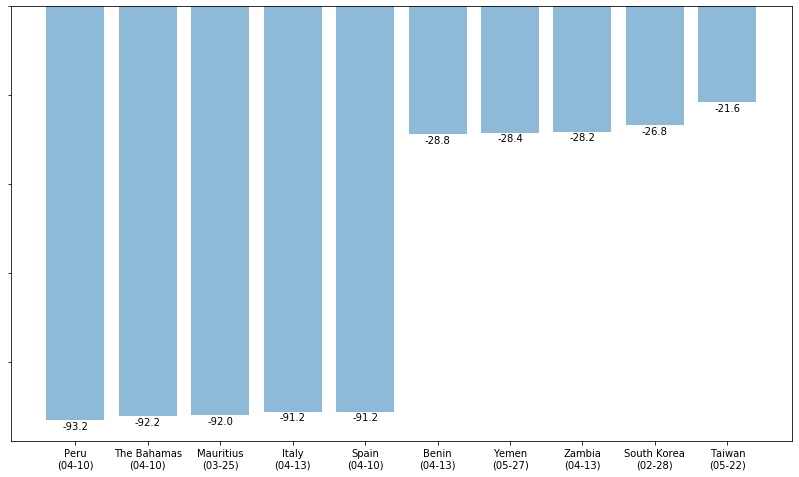

In [15]:
md.plot_extremes(outdoor_min["country"][:5].tolist() + outdoor_min["country"][-5:].tolist(), 
      outdoor_min["outdoor"][:5].tolist() + outdoor_min["outdoor"][-5:].tolist(),
     outdoor_min["date"][:5].tolist() + outdoor_min["date"][-5:].tolist())

In [16]:
outdoor_min.tail()

,country,date,outdoor
113,Benin,2020-04-13,-28.8
114,Yemen,2020-05-27,-28.4
115,Zambia,2020-04-13,-28.2
116,South Korea,2020-02-28,-26.8
117,Taiwan,2020-05-22,-21.6


In [17]:
residential_max = md.top_increase(df, "residential")[0].reset_index(drop=True)
# residential_all_time.drop_duplicates("country", inplace=True)
residential_max.head(10)

,country,date,residential
0,Singapore,2020-05-01,55.0
1,Botswana,2020-04-10,52.0
2,The Bahamas,2020-04-10,51.0
3,Peru,2020-04-10,51.0
4,Panama,2020-04-10,50.0
5,Zimbabwe,2020-04-13,49.0
6,Sri Lanka,2020-04-03,47.0
7,Bolivia,2020-04-10,47.0
8,Portugal,2020-04-10,46.0
9,Kuwait,2020-05-14,46.0


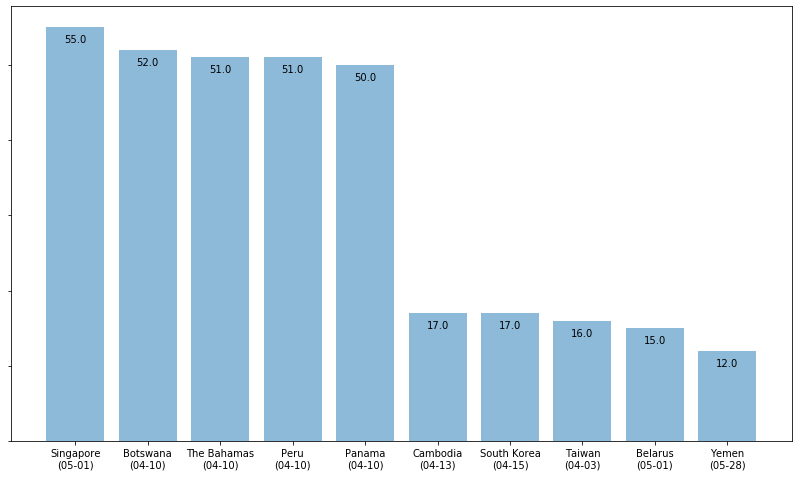

In [18]:
md.plot_extremes(residential_max["country"][:5].tolist() + residential_max["country"][-5:].tolist(),
      residential_max["residential"][:5].tolist() + residential_max["residential"][-5:].tolist(),
      residential_max["date"][:5].tolist() + residential_max["date"][-5:].tolist())

In [19]:
residential_max.tail()

,country,date,residential
113,Cambodia,2020-04-13,17.0
114,South Korea,2020-04-15,17.0
115,Taiwan,2020-04-03,16.0
116,Belarus,2020-05-01,15.0
117,Yemen,2020-05-28,12.0


In [20]:
outdoor_extreme_date = outdoor_min.groupby("date")["country"].count().sort_values(ascending=False)
residential_extreme_date = residential_max.groupby("date")["country"].count().sort_values(ascending=False)

def df_4pie(series, to_keep):
    length = len(series)
    series["others"] = sum(series[to_keep:])
    series = series.drop(series.index[to_keep:length])
    
    convert_d = [" ".join([f"[{i+1}]",str(d)[:10]]) for i, d in enumerate(series.index[:-1])]
    convert_d.append(f"other {length-to_keep} dates")
    series.index = convert_d
    
    return series

pie1 = df_4pie(outdoor_extreme_date, to_keep=3)
pie2 = df_4pie(residential_extreme_date, to_keep=3)

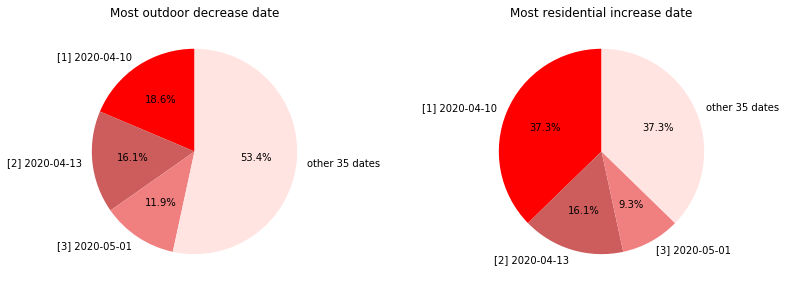

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
colors = ["red", "indianred", "lightcoral", "mistyrose"]
ax1.pie(pie1, colors=colors, labels=pie1.index, startangle=90, autopct="%1.1f%%")
ax2.pie(pie2, colors=colors, labels=pie1.index, startangle=90, autopct="%1.1f%%")

ax1.set_title("Most outdoor decrease date")
ax2. set_title("Most residential increase date")
fig.tight_layout(pad=5)
plt.show()

In [22]:
date_extreme = str(residential_extreme_date.index[0])[:10]
date_extreme

'2020-04-10'

In [23]:
#global total case 1tr6
#daily new case 120.000case

In [32]:
daily_rec_df = pd.read_csv(daily_new_path, index_col=0)
daily_rec_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054
Albania,0,0,0,0,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197
Algeria,0,0,0,0,0,0,0,0,0,0,...,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831
Andorra,0,0,0,0,0,0,0,0,0,0,...,763,763,763,764,764,764,765,844,851,852
Angola,0,0,0,0,0,0,0,0,0,0,...,70,71,74,81,84,86,86,86,86,86


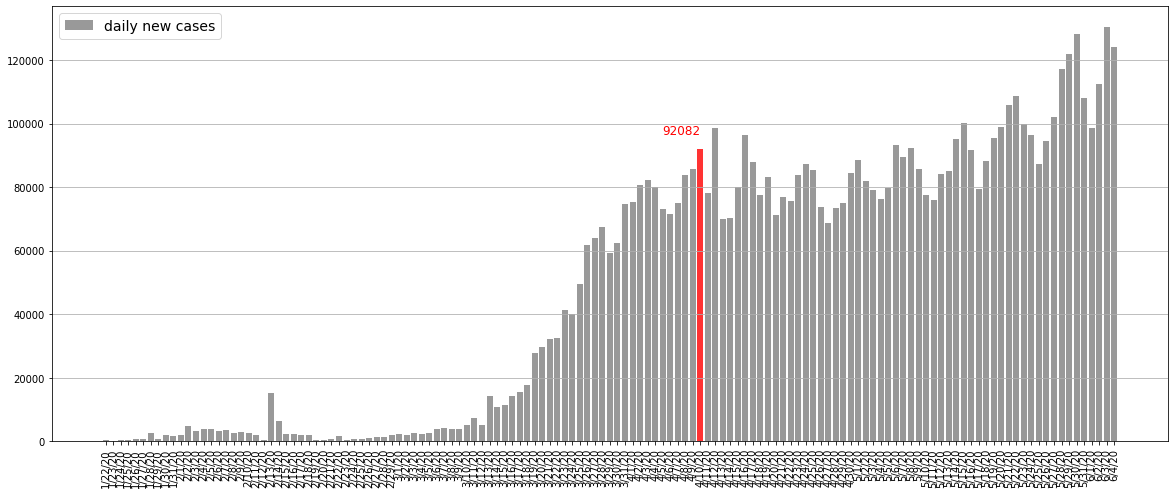

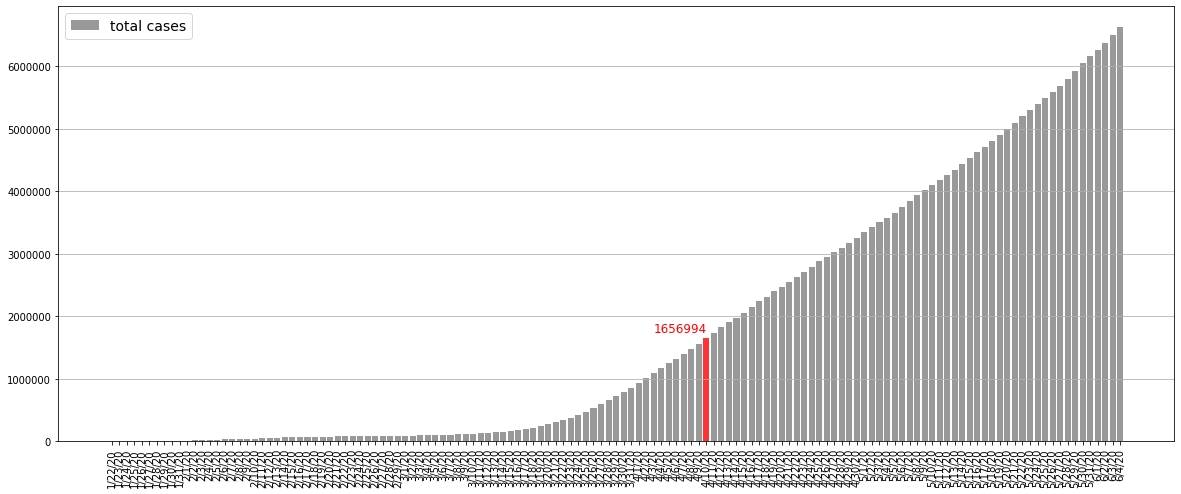

In [33]:
total = []
for i in range(len(daily_rec_df.columns)):
    total.append(daily_rec_df.iloc[:, i].sum())
new_total = [total[0]]
for i in range(1, len(total)):
    new_total.append(total[i] - total[i-1])

def oned_bar_plot(y, label):
    highlight = "4/10/20"
    x = daily_rec_df.columns
#     x = convert_d = [datetime.strptime(d, "%m/%d/%y") for d in daily_rec_df.columns]

    fig, ax = plt.subplots(figsize=(20,8))
    plt.bar(x, y, color="grey", alpha=0.8, label=label)
    

    for i, v in enumerate(y):
        if daily_rec_df.columns[i] == highlight:
            ax.text(i, v*1.05, v, color="red", fontsize=12, horizontalalignment="right")
    plt.xticks(rotation=90)
    plt.gca().yaxis.grid(True)

    pos = daily_rec_df.columns.get_loc(highlight)
    ax.patches[pos].set_facecolor("red")
        
    plt.legend(loc="upper left", fontsize=14)
    plt.show()

oned_bar_plot(new_total, "daily new cases")
oned_bar_plot(total, "total cases")

In [34]:
df.head()

,continent,country,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,outdoor,acc_case,acc_death,new_case,new_death,continent_marker
0,Asia and Oceania,Afghanistan,2020-02-15,-9.0,-10.0,0.0,-2.0,-28.0,5.0,-9.8,0,0,0,0,0.843330
1,Asia and Oceania,Afghanistan,2020-02-16,3.0,11.0,1.0,10.0,4.0,0.0,5.8,0,0,0,0,0.746745
2,Asia and Oceania,Afghanistan,2020-02-17,6.0,11.0,2.0,9.0,5.0,-1.0,6.6,0,0,0,0,0.850087
3,Asia and Oceania,Afghanistan,2020-02-18,3.0,5.0,3.0,9.0,6.0,-1.0,5.2,0,0,0,0,0.802464
4,Asia and Oceania,Afghanistan,2020-02-19,-1.0,3.0,1.0,0.0,5.0,1.0,1.6,0,0,0,0,1.254688


In [35]:
means = []
category = []
for d in [date_1, date_extreme, date_last]:
    df_d = md.get_specific_dates(df, d)
#     print(df_d.head())
    m = [d]
    for category in df_d.columns:
        m.append(df_d[f"{category}"].mean())
    means.append(m)

df_date1 = md.get_specific_dates(df, date_1)
means_df = pd.DataFrame(means)
means_df.set_index(0, inplace=True)
means_df.columns = df_date1.columns
means_df

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,outdoor,residential
0,,,,,,,
2020-02-15,2.084746,1.550847,5.127119,1.474576,2.728814,2.593220,0.254237
2020-04-10,-63.101695,-40.279661,-32.864407,-63.974576,-58.627119,-51.769492,27.288136
2020-05-29,-33.076271,-11.271186,-9.203390,-38.669492,-26.440678,-23.732203,14.271186


In [36]:
df.head()

,continent,country,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,outdoor,acc_case,acc_death,new_case,new_death,continent_marker
0,Asia and Oceania,Afghanistan,2020-02-15,-9.0,-10.0,0.0,-2.0,-28.0,5.0,-9.8,0,0,0,0,0.843330
1,Asia and Oceania,Afghanistan,2020-02-16,3.0,11.0,1.0,10.0,4.0,0.0,5.8,0,0,0,0,0.746745
2,Asia and Oceania,Afghanistan,2020-02-17,6.0,11.0,2.0,9.0,5.0,-1.0,6.6,0,0,0,0,0.850087
3,Asia and Oceania,Afghanistan,2020-02-18,3.0,5.0,3.0,9.0,6.0,-1.0,5.2,0,0,0,0,0.802464
4,Asia and Oceania,Afghanistan,2020-02-19,-1.0,3.0,1.0,0.0,5.0,1.0,1.6,0,0,0,0,1.254688


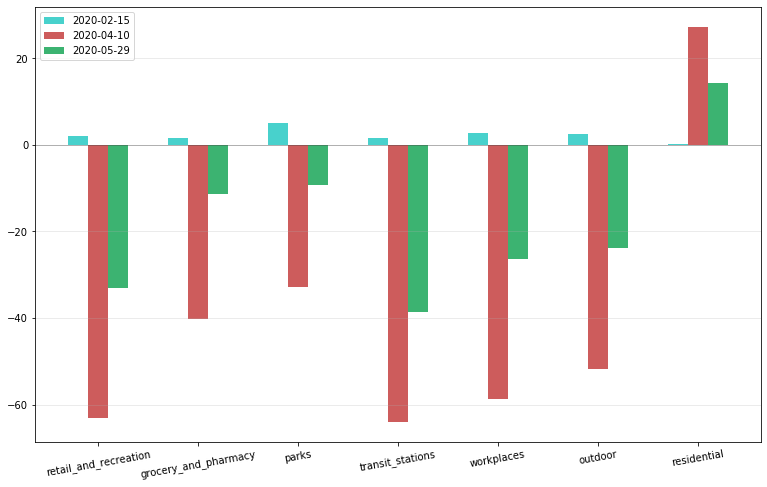

In [37]:
fig, ax = plt.subplots(figsize=(13,8))

x0 = []
x1 = [1,2,3,4,5,6,7]
x2 = []
for n in x1:
    x0.append(n-0.2)
    x2.append(n+0.2)
x = [x0, x1,x2]
labels = means_df.index.tolist()
colors = ["mediumturquoise", "indianred", "mediumseagreen"]

for i in range(len(means_df)):
    plt.bar(x[i], means_df.iloc[i, :], label=labels[i], width=0.2, color=colors[i])

ax.axhline(0, color="black", alpha=0.5, linewidth=0.5)
    
xticklabels = [0]
for i in means_df.columns.tolist():
    xticklabels.append(i)    
ax.set_xticklabels(xticklabels)
plt.xticks(rotation=10)
plt.gca().yaxis.grid(True, alpha=0.3)
# ax.grid(which="y")
plt.legend()
plt.show()

c:\users\mppc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\mppc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


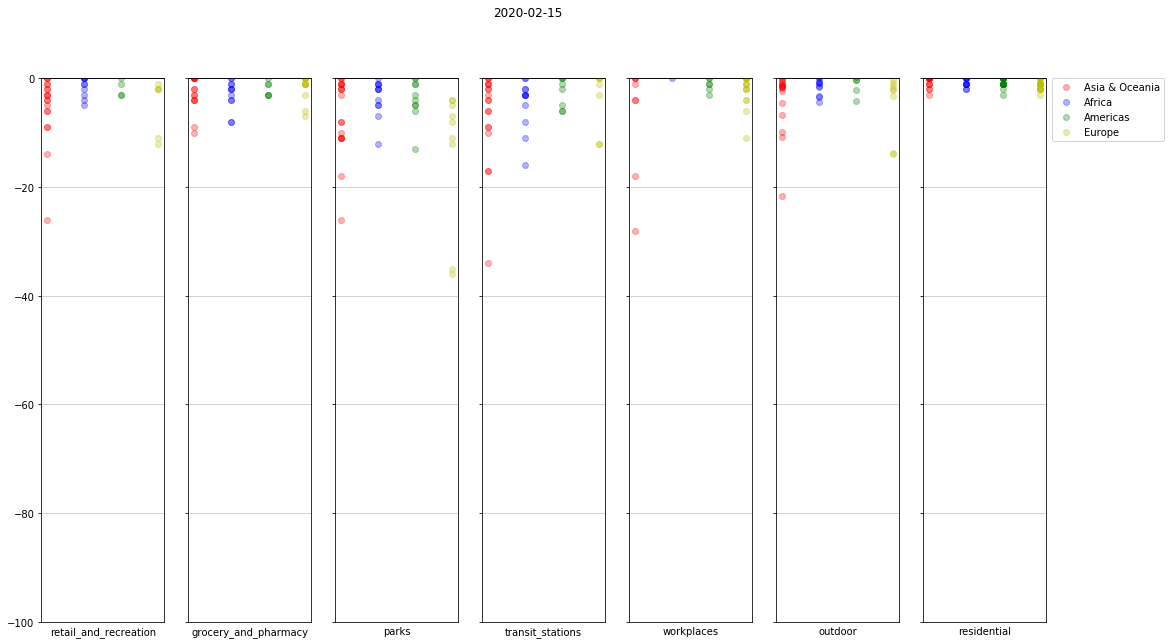

In [42]:
md.plot_mobility(filename, date_1, action="show")

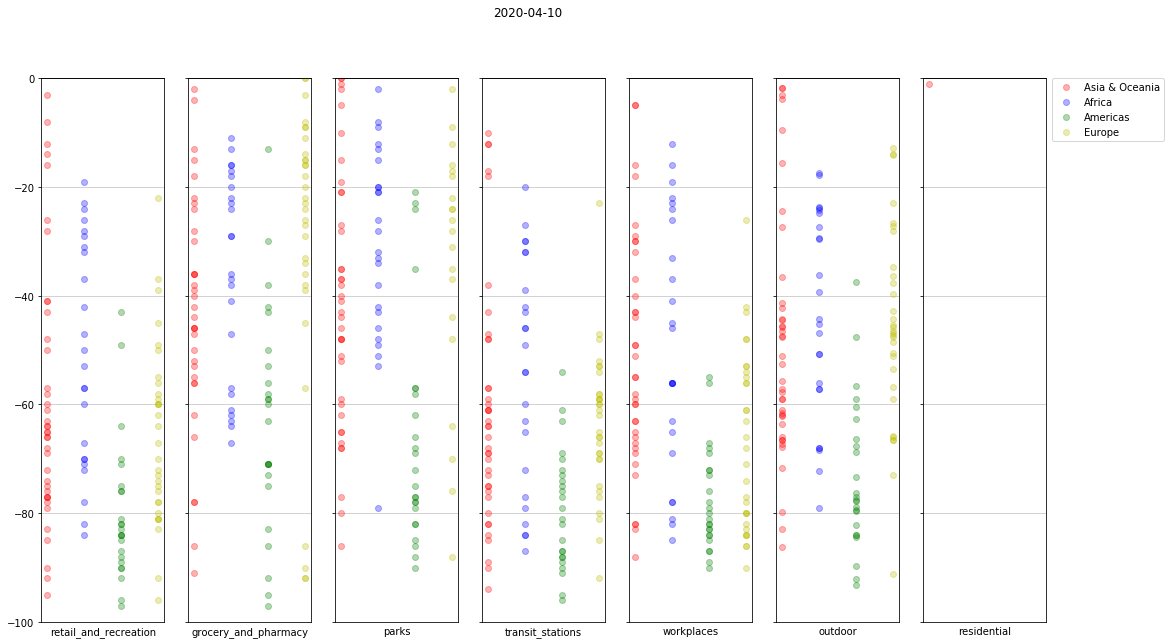

In [43]:
md.plot_mobility(filename, date_extreme, action="show")

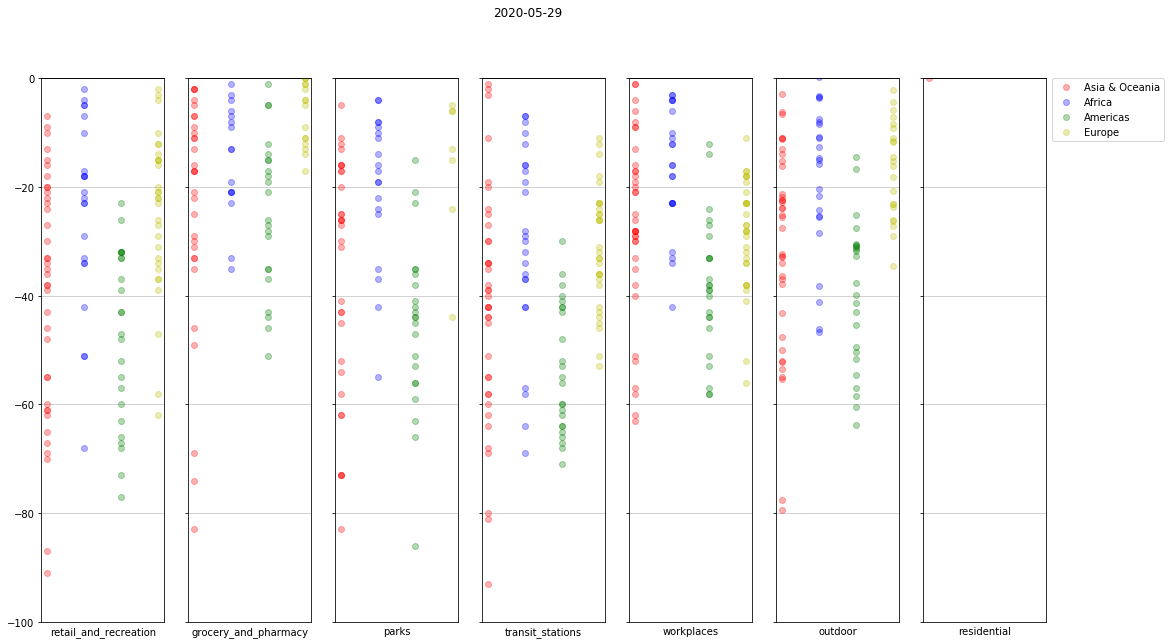

In [44]:
md.plot_mobility(filename, date_last, action="show")

In [86]:
df_sea = pd.read_csv("C:\programming\mobility\dfs\sea_mobility_df.csv", index_col=0)
df_sea.head()

FileNotFoundError: [Errno 2] File b'C:\\programming\\mobility\\dfs\\sea_mobility_df.csv' does not exist: b'C:\\programming\\mobility\\dfs\\sea_mobility_df.csv'

In [88]:
df_sea["country"].unique()

array(['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Philippines',
       'Singapore', 'Taiwan', 'Thailand', 'Vietnam'], dtype=object)

In [89]:
outdoor_all_time_sea = md.top_decrease(df_sea, "outdoor")[0].reset_index(drop=True)
outdoor_all_time_sea

,country,date,outdoor
0,Philippines,2020-04-10,-79.8
1,Malaysia,2020-03-22,-69.8
2,Singapore,2020-05-01,-63.0
3,Vietnam,2020-04-02,-55.6
4,Laos,2020-04-17,-49.6
5,Indonesia,2020-05-01,-47.0
6,Thailand,2020-04-06,-45.8
7,Cambodia,2020-04-14,-42.0
8,Taiwan,2020-05-22,-21.6


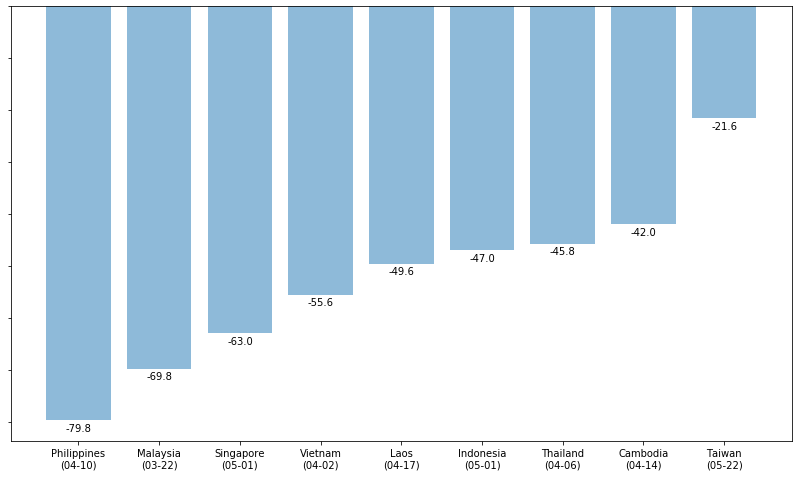

In [90]:
md.plot_extremes(outdoor_all_time_sea["country"], outdoor_all_time_sea["outdoor"], outdoor_all_time_sea["date"])

In [91]:
residential_all_time_sea = md.top_increase(df_sea, "residential")[0].reset_index(drop=True)
residential_all_time_sea.drop_duplicates("country", inplace=True)
residential_all_time_sea

,country,date,residential
0,Singapore,2020-05-01,55.0
1,Philippines,2020-04-10,43.0
2,Malaysia,2020-05-01,41.0
3,Indonesia,2020-05-01,25.0
4,Thailand,2020-04-06,23.0
5,Vietnam,2020-04-02,23.0
6,Laos,2020-04-10,22.0
7,Cambodia,2020-04-13,17.0
8,Taiwan,2020-04-03,16.0


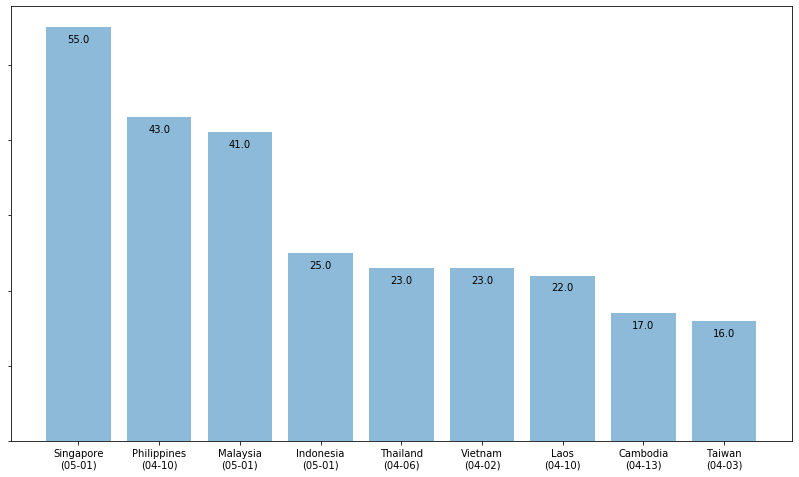

In [92]:
md.plot_extremes(residential_all_time_sea["country"], residential_all_time_sea["residential"], residential_all_time_sea["date"])

In [32]:
# cases_synced_df = pd.read_csv(cases_synced_path, index_col=0)
# cases_synced_df.head()

In [33]:
df.columns

Index(['continent', 'country', 'date', 'retail_and_recreation',
       'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
       'residential', 'outdoor', 'acc_case', 'acc_death', 'new_case',
       'new_death', 'continent_marker'],
      dtype='object')

In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def plot2(country_name, special_col):
    register_matplotlib_converters()
    country_df = df[df["country"]==country_name]
    categories = ['retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential', 'outdoor']
    
#     def get_new_case(df):
#         l_new = df.loc[country_name].values.tolist()
#         new = [l_new[0]]
#         for i in range(1, len(l_new)):
#             new.append(l_new[i]-l_new[i-1])
#         return new
#     new_case = get_new_case(cases_synced_df)
#     new_death = get_new_case(death_synced_df)

    fig, ax0 = plt.subplots(figsize=(12,8))
    for col in ["residential", "outdoor"]:
        ax0.plot(country_df["date"], country_df[col], label=col, linewidth=3)

    if special_col == 0:
        pass
    elif special_col == 1:
        for col in categories:
            ax0.plot(country_df["date"], country_df[col], label=col, alpha=0.9, linewidth=0.7)
#             ax0.plot(country_df["date"], country_df[col], label=col, linewidth=3)

    else:
        for col in special_col:
            ax0.plot(country_df["date"], country_df[col], label=col, alpha=0.9, linewidth=0.7)
    
    ax0.set_ylim([-100, 100])
    ax0.axhline(0, color="grey", linewidth=1, alpha=0.8)
    ax0.legend(loc="upper left")

    ax1 = ax0.twinx()
    plt.bar(country_df["date"], country_df["new_case"], label="daily new CASE", alpha=0.2)
    plt.bar(country_df["date"], country_df["new_death"], label="daily new DEATH", color="grey", alpha=0.5)
    plt.title(f"Mobility vs Daily New Case in: {country_name.upper()}")
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()

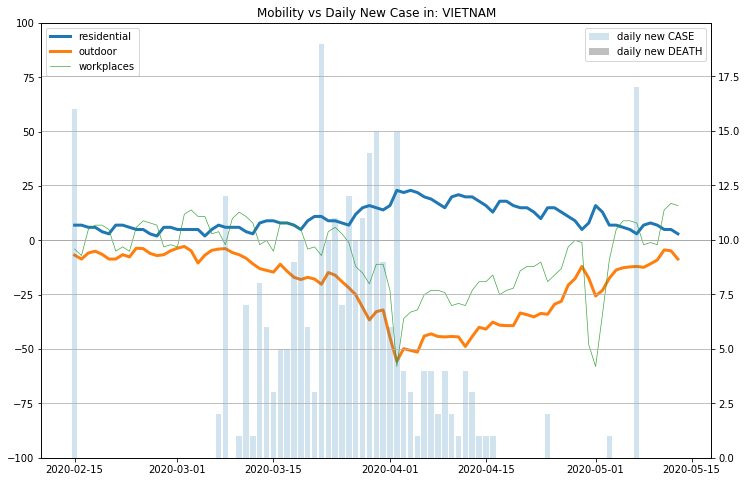

In [35]:
plot2("Vietnam", ["workplaces"])

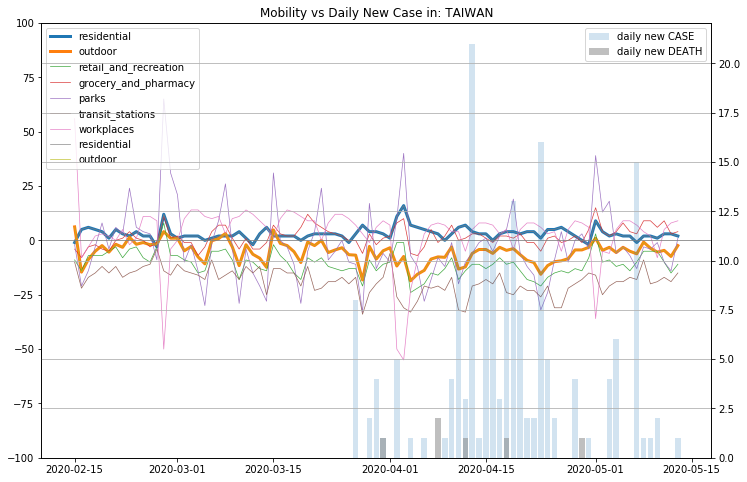

In [36]:
plot2("Taiwan", 1)

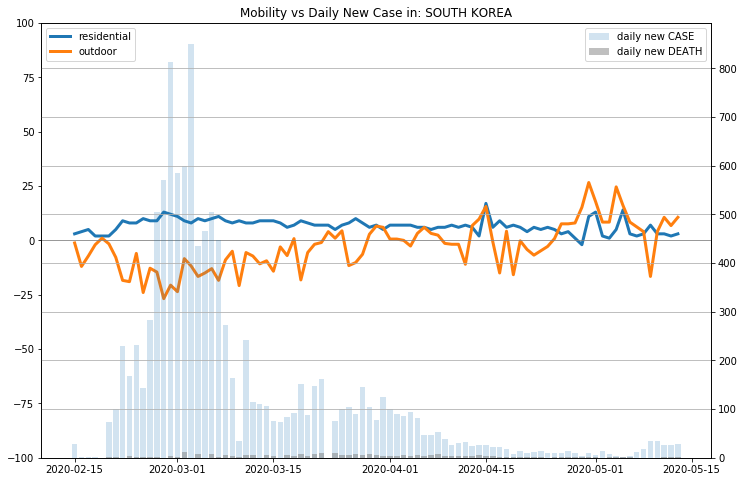

In [37]:
plot2("South Korea", 0)

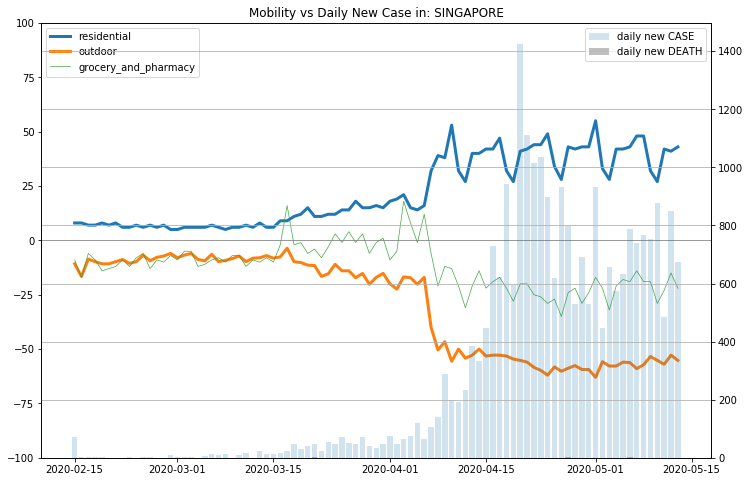

In [38]:
plot2("Singapore", ["grocery_and_pharmacy"])

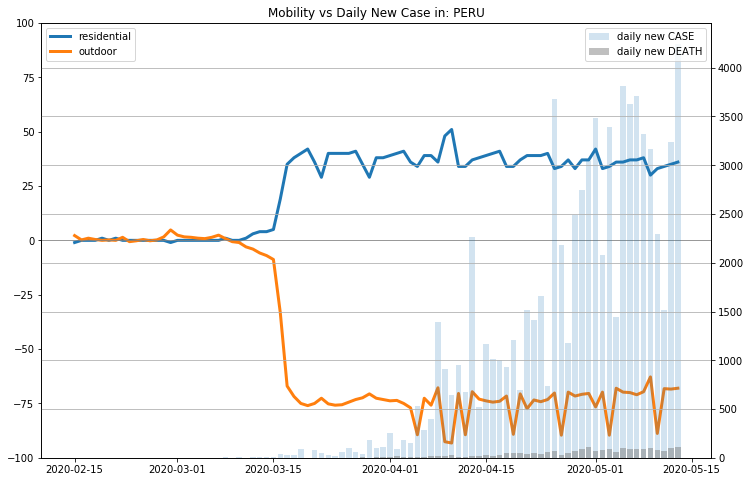

In [39]:
plot2("Peru", 0)

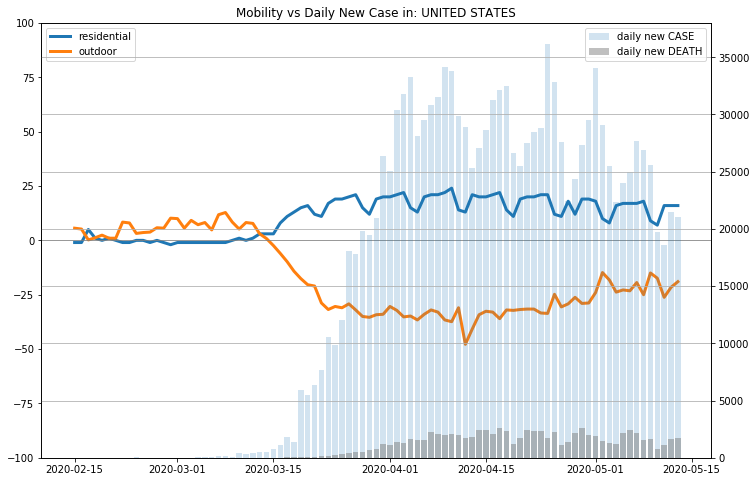

In [40]:
plot2("United States", 0)

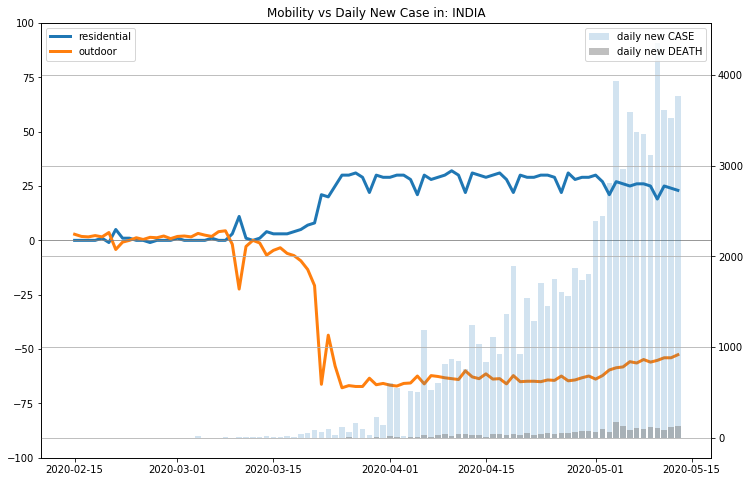

In [41]:
plot2("India", 0)

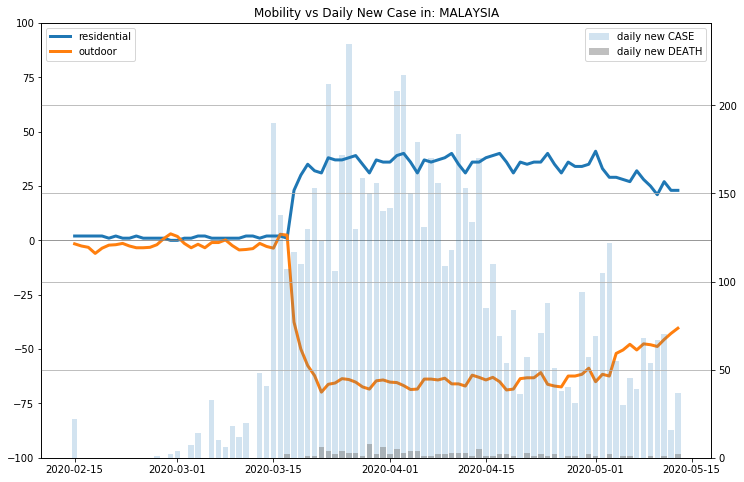

In [42]:
plot2("Malaysia", 0)

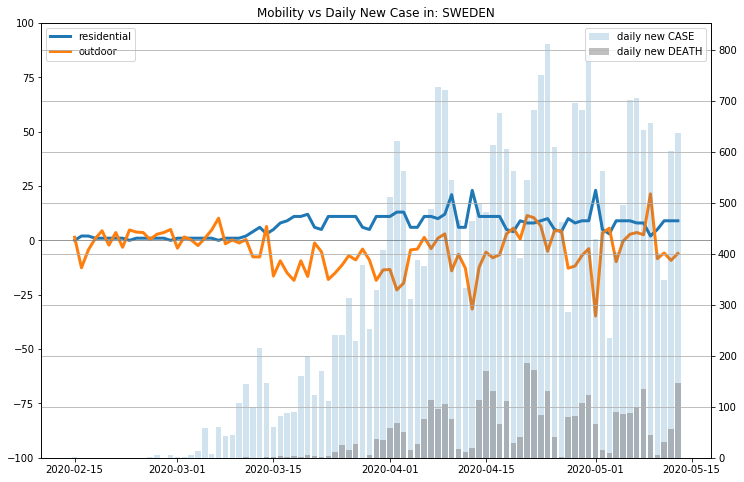

In [43]:
plot2("Sweden", 0)

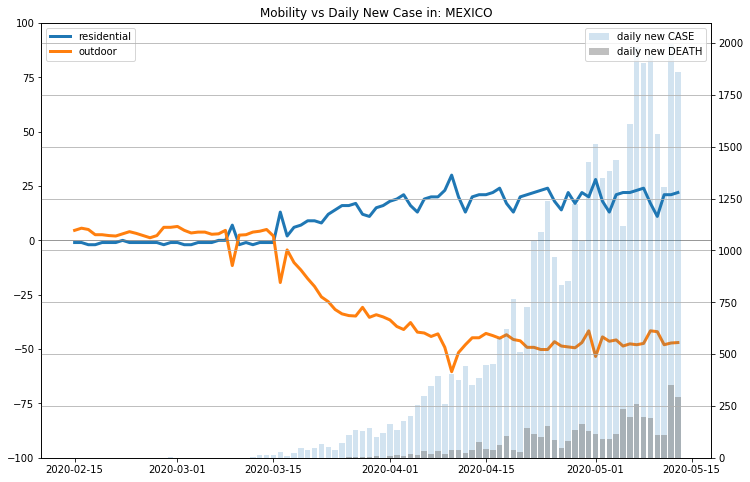

In [44]:
plot2("Mexico", 0)